### __Codificación de palabras y documentos__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__1. One-hot Encoding - OHE__

In [2]:
#Vamos a codificar dos frases sencillas con OHE
sentenceA = 'Cats and dogs are allowed'
sentenceB = 'Dogs and cats are antagonistic'

#Pre-procesamos: convertimos todo a minúscula
wordsA = sentenceA.lower()
wordsB = sentenceB.lower()

#Descomponemos las frases en palabras
wordsA = wordsA.split(" ")
wordsB = wordsB.split(" ")

print(f"Palabras de la primera frase: {wordsA}")
print(f"Palabras de la segunda frase: {wordsB}")

Palabras de la primera frase: ['cats', 'and', 'dogs', 'are', 'allowed']
Palabras de la segunda frase: ['dogs', 'and', 'cats', 'are', 'antagonistic']


In [3]:
#Generamos un diccionario en formato lista de palabras únicas
allWords = wordsA + wordsB
uniqueWords = set(allWords)
dictionary = sorted(list(uniqueWords))
print(f"Diccionaro creado: {dictionary}")

Diccionaro creado: ['allowed', 'and', 'antagonistic', 'are', 'cats', 'dogs']


In [4]:
#Vamos a generar la codificacion OHE en un DataFrame
dfDictionary = pd.DataFrame(dictionary, columns =["word"])
dfDictionary

,word
0,allowed
1,and
2,antagonistic
3,are
4,cats
5,dogs


In [5]:
#Usamos la funcion get_dummies para hacer el one-hot encoding
oheDictionary = pd.get_dummies(dfDictionary, columns = ["word"])
oheDictionary.index = dfDictionary["word"].values

print("Diccionario One-hot creado")
oheDictionary

Diccionario One-hot creado


,word_allowed,word_and,word_antagonistic,word_are,word_cats,word_dogs
allowed,1,0,0,0,0,0
and,0,1,0,0,0,0
antagonistic,0,0,1,0,0,0
are,0,0,0,1,0,0
cats,0,0,0,0,1,0
dogs,0,0,0,0,0,1


In [6]:
#Ejemplo de codificación de una palabra: "cats"
cats_code = oheDictionary.loc["cats"].values
print(f"Codificación de 'cats': {cats_code}")

Codificación de 'cats': [0 0 0 0 1 0]


In [7]:
#Ahora vamos a codificar una frase de las iniciales
oheSentenceA = np.array([])
for word in wordsA:
    oheSentenceA = np.concatenate((oheSentenceA, oheDictionary.loc[word].values))
print(f"'Cats and dogs are allowed' se codifica en OHE como:\n{oheSentenceA}")

print(f"Con un tamaño: {len(oheSentenceA)}")

'Cats and dogs are allowed' se codifica en OHE como:
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0.]
Con un tamaño: 30


In [8]:
#Si El Quijote tiene cerca de 450.000 palabras
#de las cuales cerca de 20.000 son únicas
# ¿Cuántas dimensiones tiene el OHE de El Quijote?

In [9]:
dimOHEQuijote = 450000*20000
print(dimOHEQuijote)

9000000000


In [10]:
# ¿Cuántas dimensiones tendría en Bag of Words?
# Vamos a comprobarlo

__2. Bag of Words - BoW__

In [11]:
#Vamos a calcular el BoW individual y el BoW conjunto de 4 libros clásicos
#Abrimos los libros y leemos todos los caracteres que contienen

import io
f = io.open("./Data/Quijote.txt", mode="r", encoding="utf-8")
quijote = f.read().lower()

f = io.open("./Data/Hamlet.txt", mode="r", encoding="utf-8")
hamlet = f.read().lower()

f = io.open("./Data/Crimen_Castigo.txt", mode="r", encoding="utf-8")
crimen = f.read().lower()

f = io.open("./Data/Frankenstein.txt", mode="r", encoding="utf-8")
frank = f.read().lower()

In [12]:
#Primero vamos a hacer un diccionario sólo con 3 palabras
word1 = "espada"
word2 = "caballero"
word3 = "doncella"

bowLiteQuijote = [quijote.count(word1),
               quijote.count(word2),
               quijote.count(word3)]

bowLiteHamlet = [hamlet.count(word1),
               hamlet.count(word2),
               hamlet.count(word3)]

bowLiteCrimen = [crimen.count(word1),
               crimen.count(word2),
               crimen.count(word3)]

bowLiteFrank = [frank.count(word1),
               frank.count(word2),
               frank.count(word3)]

print(f"BoW Encoding del Quijote = {bowLiteQuijote}")
print(f"BoW Encoding de Hamlet = {bowLiteHamlet}")
print(f"BoW Encoding de Crimen y Castigo = {bowLiteCrimen}")
print(f"BoW Encoding de Frankenstein = {bowLiteFrank}")

BoW Encoding del Quijote = [132, 971, 221]
BoW Encoding de Hamlet = [28, 41, 4]
BoW Encoding de Crimen y Castigo = [0, 15, 0]
BoW Encoding de Frankenstein = [1, 2, 0]


In [13]:
#Ahora lo vamos a hacer con todas las palabras
#Empezamos con pre-procesado
# 1) Ponemos todo en minúscula
listOfWordsA = quijote.lower()
listOfWordsB = hamlet.lower()
listOfWordsC = crimen.lower()
listOfWordsD = frank.lower()

# 2) Definimos una lista de caráctares a eliminar y los remplazmos por " "
stop_chars = "\n,.:;-_*%/$#\[\]¿?¡!\(\)—«»\'\"=1234567890"

for char in stop_chars:
    listOfWordsA = listOfWordsA.replace(char,' ')
    listOfWordsB = listOfWordsB.replace(char,' ')
    listOfWordsC = listOfWordsC.replace(char,' ')
    listOfWordsD = listOfWordsD.replace(char,' ')

# 3) Separamos cada texto (cada libro) en sus palabras
listOfWordsA = listOfWordsA.split(" ")
listOfWordsB = listOfWordsB.split(" ")
listOfWordsC = listOfWordsC.split(" ")
listOfWordsD = listOfWordsD.split(" ")

print(f"Total de palabras en quijote = {len(listOfWordsA)}")
print(f"Total de palabras en Hamlet = {len(listOfWordsB)}")
print(f"Total de palabras en Crimen y Castigo = {len(listOfWordsC)}")
print(f"Total de palabras en Frankenstein = {len(listOfWordsD)}")

Total de palabras en quijote = 463408
Total de palabras en Hamlet = 56658
Total de palabras en Crimen y Castigo = 233153
Total de palabras en Frankenstein = 77513


In [14]:
#Extraemos las palabras únicas de cada libro
uniqueWordsA = sorted(list(set(listOfWordsA)))
print(f"El Quijote tiene {len(uniqueWordsA)} palabras únicas")

uniqueWordsB = sorted(list(set(listOfWordsB)))
print(f"Hamlet tiene {len(uniqueWordsB)} palabras únicas")

uniqueWordsC = sorted(list(set(listOfWordsC)))
print(f"Crimen y Castigo tiene {len(uniqueWordsC)} palabras únicas")

uniqueWordsD = sorted(list(set(listOfWordsD)))
print(f"Frankenstein tiene {len(uniqueWordsD)} palabras únicas")

El Quijote tiene 23607 palabras únicas
Hamlet tiene 7232 palabras únicas
Crimen y Castigo tiene 15254 palabras únicas
Frankenstein tiene 10282 palabras únicas


In [15]:
#Vamos a calcular el BoW del Quijote
dictionaryA = dict.fromkeys(uniqueWordsA, 0)
for word in listOfWordsA:
    dictionaryA[word] += 1

itemsA = dictionaryA.items()
    
print(f"Los primeros 10 elementos del diccionario del Quijote:\n {list(itemsA)[:10]}")

Los primeros 10 elementos del diccionario del Quijote:
 [('', 76609), ('a', 9934), ('abad', 5), ('abadejo', 2), ('abades', 1), ('abadesa', 2), ('abaja', 1), ('abajan', 1), ('abajarse', 2), ('abajen', 1)]


In [16]:
#Eliminamos el valor ''
dictionaryA.pop("")

76609

In [17]:
#Vemos la codificación BoW de El Quijote
BoWA = list(dictionaryA.values())
print(f"El Quijote codificado en Bag of Words:\n{BoWA}")

El Quijote codificado en Bag of Words:
[9934, 5, 2, 1, 2, 1, 1, 2, 1, 41, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 12, 1, 13, 11, 3, 13, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 5, 1, 3, 1, 1, 2, 3, 8, 6, 1, 4, 3, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 5, 1, 6, 4, 1, 4, 12, 2, 1, 2, 4, 1, 1, 1, 2, 2, 5, 1, 2, 1, 2, 1, 16, 1, 3, 1, 4, 1, 1, 4, 1, 1, 6, 9, 3, 1, 2, 4, 1, 2, 1, 1, 14, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 25, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 17, 5, 1, 4, 1, 1, 2, 3, 2, 1, 23, 11, 3, 1, 1, 19, 4, 1, 29, 1, 1, 1, 3, 2, 6, 14, 52, 3, 1, 2, 2, 1, 12, 3, 3, 4, 3, 1, 12, 4, 2, 21, 3, 6, 1, 2, 1, 1, 2, 1, 1, 1, 60, 9, 1, 7, 1, 1, 1, 1, 1, 5, 6, 2, 2, 1, 1, 1, 1, 1, 1, 54, 3, 1, 2, 1, 10, 1, 1, 10, 4, 19, 2, 2, 1, 1, 10, 1, 2, 2, 1, 1, 1, 2, 4, 1, 2, 1, 1, 2, 1, 27, 1, 3, 1, 1, 9, 1, 3, 1, 3, 1, 23, 1, 1, 10, 5, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 9, 3

El tamaño del BoW de El Quijote es:23606


Text(0.5, 1.0, "Bag of Words de 'El Quijote'")

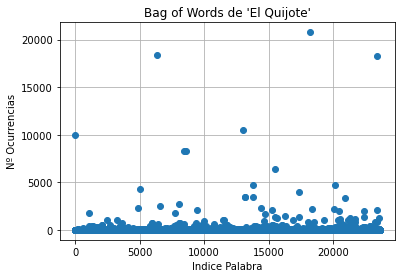

In [18]:
print(f"El tamaño del BoW de El Quijote es:{len(BoWA)}")
plt.plot(BoWA,'o')
plt.grid()
plt.xlabel("Indice Palabra")
plt.ylabel("Nº Ocurrencias")
plt.title("Bag of Words de 'El Quijote'")

In [19]:
#Vamos a calcular el BoW de Hamlet
dictionaryB = dict.fromkeys(uniqueWordsB, 0)
for word in listOfWordsB:
    dictionaryB[word] += 1
dictionaryB.pop("")

BoWB = list(dictionaryB.values())
print(f"El Quijote codificado en Bag of Words tiene {len(BoWA)} dimensiones")
print(f"Hamelt codificado en Bag of Words tiene {len(BoWB)} dimensiones")

print("\n¡NO SON COMPARABLES!")

El Quijote codificado en Bag of Words tiene 23606 dimensiones
Hamelt codificado en Bag of Words tiene 7231 dimensiones

¡NO SON COMPARABLES!


In [20]:
#Vamos a generar una codificación BoW común para todos los documentos
#Generamos el conjunto de palabras únicas entre los 4 libros
allUniqueWords = sorted(list(set(listOfWordsA + listOfWordsB
                          + listOfWordsC + listOfWordsD)))
print(f"Primeras palabras del listado de palabras únicas:\n{allUniqueWords[:10]}")

Primeras palabras del listado de palabras únicas:
['', 'a', 'aba', 'abad', 'abadejo', 'abades', 'abadesa', 'abaja', 'abajan', 'abajarse']


In [21]:
#Generamos todos los BoW unificados a partir del mismo diccionario único
unifiedDictionaryA = dict.fromkeys(allUniqueWords, 0)
for word in listOfWordsA:
    unifiedDictionaryA[word] += 1
unifiedDictionaryA.pop("")
unifiedBoWA = list(unifiedDictionaryA.values())
    
unifiedDictionaryB = dict.fromkeys(allUniqueWords, 0)
for word in listOfWordsB:
    unifiedDictionaryB[word] += 1
unifiedDictionaryB.pop("")
unifiedBoWB = list(unifiedDictionaryB.values())

unifiedDictionaryC = dict.fromkeys(allUniqueWords, 0)
for word in listOfWordsC:
    unifiedDictionaryC[word] += 1    
unifiedDictionaryC.pop("")
unifiedBoWC = list(unifiedDictionaryC.values())

unifiedDictionaryD = dict.fromkeys(allUniqueWords, 0)
for word in listOfWordsD:
    unifiedDictionaryD[word] += 1
unifiedDictionaryD.pop("")
unifiedBoWD = list(unifiedDictionaryD.values())


print(f"El Quijote tiene un BoW unificado de {len(unifiedBoWA)} dimensiones")
print(f"Hamlet tiene un BoW unificado de {len(unifiedBoWB)} dimensiones")
print(f"Crimen y Castigo tiene un BoW unificado de {len(unifiedBoWC)} dimensiones")
print(f"Frankenstein tiene un BoW unificado de {len(unifiedBoWD)} dimensiones")

print("\n¡AHORA YA SON TODOS COMPARABLES!")

El Quijote tiene un BoW unificado de 37149 dimensiones
Hamlet tiene un BoW unificado de 37149 dimensiones
Crimen y Castigo tiene un BoW unificado de 37149 dimensiones
Frankenstein tiene un BoW unificado de 37149 dimensiones

¡AHORA YA SON TODOS COMPARABLES!


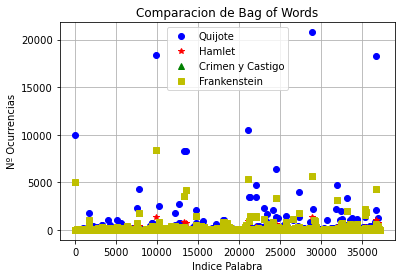

In [22]:
plt.plot(unifiedBoWA,'ob',label = 'Quijote')
plt.plot(unifiedBoWB,'*r',label = 'Hamlet')
plt.plot(unifiedBoWC,'^g',label = 'Crimen y Castigo')
plt.plot(unifiedBoWC,'sy',label = 'Frankenstein')

plt.grid()
plt.xlabel("Indice Palabra")
plt.ylabel("Nº Ocurrencias")
plt.title("Comparacion de Bag of Words")
plt.legend()

In [23]:
print(unifiedDictionaryA)

{'a': 9934, 'aba': 0, 'abad': 5, 'abadejo': 2, 'abades': 1, 'abadesa': 2, 'abaja': 1, 'abajan': 1, 'abajarse': 2, 'abajen': 1, 'abajito': 0, 'abajo': 41, 'abajó': 2, 'abalancé': 0, 'abalanzándome': 0, 'abalanzó': 0, 'abalorios': 0, 'abalánzase': 1, 'abandona': 0, 'abandonaba': 0, 'abandonaban': 0, 'abandonada': 0, 'abandonado': 0, 'abandonados': 0, 'abandonan': 0, 'abandonando': 0, 'abandonar': 0, 'abandonara': 0, 'abandonaran': 0, 'abandonarle': 0, 'abandonarlo': 0, 'abandonarme': 1, 'abandonaron': 0, 'abandonaros': 0, 'abandonará': 0, 'abandonarán': 0, 'abandonarás': 0, 'abandonaré': 0, 'abandonaría': 0, 'abandone': 0, 'abandonen': 0, 'abandones': 0, 'abandono': 0, 'abandoné': 0, 'abandonó': 0, 'abandónese': 0, 'abanico': 0, 'abarraganada': 1, 'abarraganados': 1, 'abatanar': 1, 'abaten': 2, 'abatida': 0, 'abatido': 2, 'abatidos': 0, 'abatidísimo': 0, 'abatiendo': 1, 'abatieres': 1, 'abatieron': 2, 'abatiese': 0, 'abatimiento': 0, 'abatir': 0, 'abatirse': 0, 'abatían': 0, 'abc': 3, 'a